Ideal Output & Deliverables

The ideal output of this project will be:
A dashboard that implements predictive models to find what helps/harms a student's progression through school. 
A final report answers the Base Question:
What are the best predictors of student retention (i.e., the prevention of student dropouts)?

https://docs.google.com/document/d/1XHfDhUMD1c868baqg_8Kk4j2PJzwHRX8Psf7PTKLgss/edit?tab=t.0

In [3]:
import pandas as pd
import numpy as np

# Uganda Data

### Load in Data

In [6]:
df_Uganda = pd.read_excel("/Users/matthewmaslow/Desktop/Uganda - 2024 10 02(v1).xlsx",
                         sheet_name="ug_fact_student_attendance")

In [7]:
df_Uganda['StudentIsPresent'].value_counts()

StudentIsPresent
True     793798
False    155987
Name: count, dtype: int64

In [8]:
df_Uganda.head()

,MonthYear,GradeId,StudentIsPresent,ReasonType,StudentAbsenseReason,StudentAttendanceDate,ClassID,ChildrenId,ExistedClasId,WeekDayN,...,MonthYearSort,AcademicYearId,AcademicYearName,Year,Project,Gender,Cycle,RecordId,AcademicYearStartDate,AcademicYearEndtDate
0,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28503,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Female,Literacy-Cycle 1,182765,2022-09-04,2023-01-13
1,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28504,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182766,2022-09-04,2023-01-13
2,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28505,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182767,2022-09-04,2023-01-13
3,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28506,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Male,Literacy-Cycle 1,182768,2022-09-04,2023-01-13
4,2022-09-01,2,True,NaN,NaN,"Monday, September 12, 2022",2850,28507,True,1,...,202209,25.0,2022-PPL-Literacy-CuC Cycle 1,2022.0,PPL,Female,Literacy-Cycle 1,182769,2022-09-04,2023-01-13


In [9]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   MonthYear              949785 non-null  datetime64[ns]
 1   GradeId                949785 non-null  int64         
 2   StudentIsPresent       949785 non-null  bool          
 3   ReasonType             155987 non-null  object        
 4   StudentAbsenseReason   155987 non-null  object        
 5   StudentAttendanceDate  949785 non-null  object        
 6   ClassID                949785 non-null  int64         
 7   ChildrenId             949785 non-null  int64         
 8   ExistedClasId          949785 non-null  bool          
 9   WeekDayN               949785 non-null  int64         
 10  SchoolId               949785 non-null  int64         
 11  ClassName              949785 non-null  object        
 12  Week                   949785 non-null  obje

In [10]:
df_Uganda.describe()

,MonthYear,GradeId,ClassID,ChildrenId,WeekDayN,SchoolId,WeekNum,MonthYearSort,AcademicYearId,Year,RecordId,AcademicYearStartDate,AcademicYearEndtDate
count,949785,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,949785.000000,877753.000000,877753.000000,949785.000000,877753,877753
mean,2023-03-22 07:30:03.928678400,6.158040,3057.990023,37491.353715,3.003385,172.350223,29.156406,202278.719590,30.192762,2022.735281,476124.799743,2023-03-13 09:22:22.886665984,2023-07-20 09:51:32.634488832
min,2021-08-01 00:00:00,1.000000,1879.000000,20999.000000,1.000000,88.000000,1.000000,202108.000000,21.000000,2022.000000,1.000000,2022-01-03 00:00:00,2022-06-15 00:00:00
25%,2022-11-01 00:00:00,2.000000,2473.000000,29035.000000,2.000000,143.000000,15.000000,202211.000000,25.000000,2022.000000,238595.000000,2022-11-01 00:00:00,2023-03-31 00:00:00
50%,2023-05-01 00:00:00,3.000000,3178.000000,37887.000000,3.000000,167.000000,33.000000,202305.000000,30.000000,2023.000000,476344.000000,2023-04-03 00:00:00,2023-09-01 00:00:00
75%,2023-10-01 00:00:00,4.000000,3596.000000,45404.000000,4.000000,206.000000,43.000000,202310.000000,34.000000,2023.000000,713846.000000,2023-07-15 00:00:00,2023-12-15 00:00:00
max,2024-02-01 00:00:00,27.000000,4025.000000,54814.000000,7.000000,271.000000,53.000000,202402.000000,41.000000,2024.000000,951323.000000,2024-01-02 00:00:00,2024-05-16 00:00:00
std,NaN,7.208931,623.034401,9472.144651,1.458241,49.032464,15.239789,70.215601,5.727238,0.606958,274502.726138,NaN,NaN


### Prep Data

In [12]:
# Convert boolean columns to int64 (False = 0, True = 1)
boolean_columns = df_Uganda.select_dtypes(include='bool').columns
df_Uganda[boolean_columns] = df_Uganda[boolean_columns].astype(float)

In [13]:
df_Uganda['StudentAttendanceDate'] = df_Uganda['StudentAttendanceDate'].astype('datetime64[ns]')
columns_to_convert = ['ReasonType', 'StudentAbsenseReason', 'AcademicYearName', 'Project', 'Gender', 'Cycle']
df_Uganda[columns_to_convert] = df_Uganda[columns_to_convert].astype('category')

In [14]:
df_Uganda = df_Uganda.select_dtypes(exclude=['datetime64[ns]', 'object'])

In [15]:
df_Uganda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949785 entries, 0 to 949784
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   GradeId               949785 non-null  int64   
 1   StudentIsPresent      949785 non-null  float64 
 2   ReasonType            155987 non-null  category
 3   StudentAbsenseReason  155987 non-null  category
 4   ClassID               949785 non-null  int64   
 5   ChildrenId            949785 non-null  int64   
 6   ExistedClasId         949785 non-null  float64 
 7   WeekDayN              949785 non-null  int64   
 8   SchoolId              949785 non-null  int64   
 9   WeekNum               949785 non-null  int64   
 10  MonthYearSort         949785 non-null  int64   
 11  AcademicYearId        877753 non-null  float64 
 12  AcademicYearName      877753 non-null  category
 13  Year                  877753 non-null  float64 
 14  Project               877753 non-nul

### Model

#### Training - Logistic, Random Forest, and MLP Neural Network

Evaluating Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Logistic Regression....
Validation Accuracy: 0.66
Test Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.27      0.60      0.37     31228
         1.0       0.90      0.68      0.77    158729

    accuracy                           0.66    189957
   macro avg       0.58      0.64      0.57    189957
weighted avg       0.79      0.66      0.70    189957



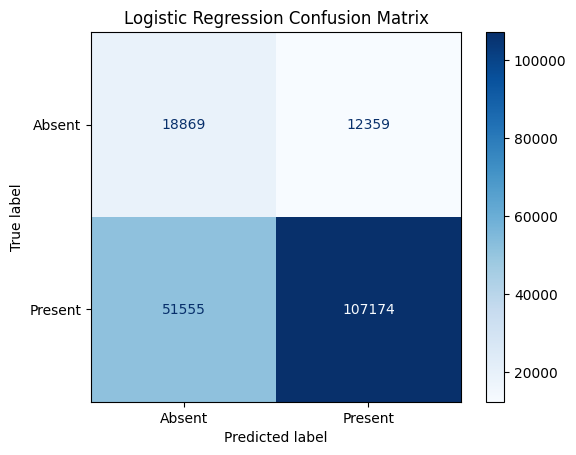



Evaluating Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest....
Validation Accuracy: 0.74
Test Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.62      0.44     31228
         1.0       0.91      0.77      0.83    158729

    accuracy                           0.74    189957
   macro avg       0.63      0.69      0.64    189957
weighted avg       0.82      0.74      0.77    189957



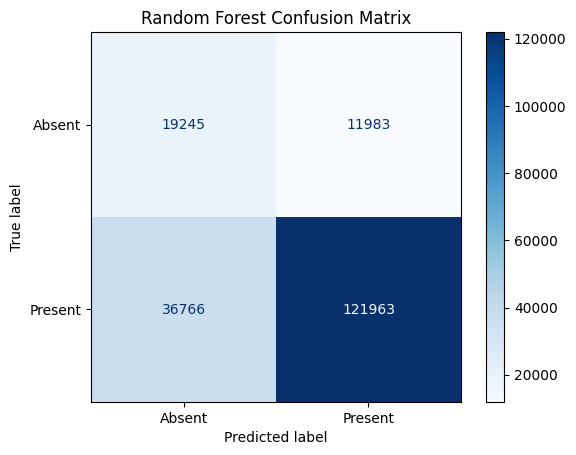



Evaluating Balanced Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Balanced Random Forest....
Validation Accuracy: 0.76
Test Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.35      0.58      0.44     31228
         1.0       0.91      0.79      0.84    158729

    accuracy                           0.76    189957
   macro avg       0.63      0.69      0.64    189957
weighted avg       0.81      0.76      0.78    189957



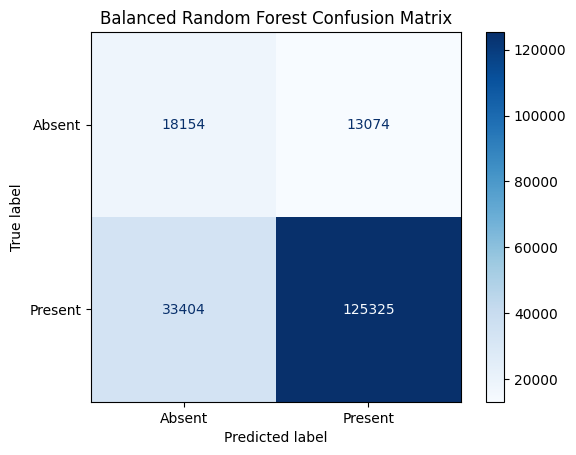



Evaluating MLP Neural Network...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MLP Neural Network....
Validation Accuracy: 0.66
Test Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

         0.0       0.27      0.60      0.37     31228
         1.0       0.90      0.68      0.77    158729

    accuracy                           0.66    189957
   macro avg       0.58      0.64      0.57    189957
weighted avg       0.79      0.66      0.70    189957



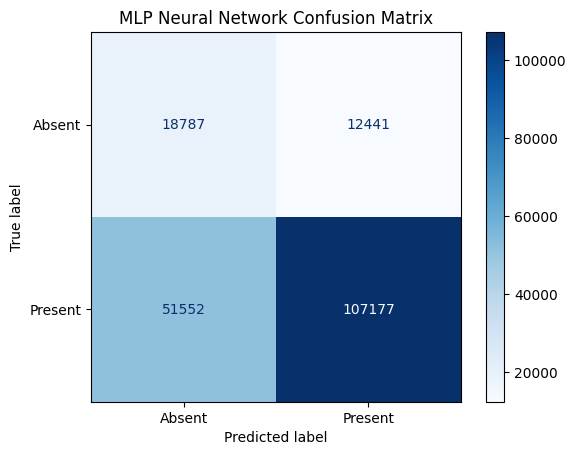

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

transformer = make_column_transformer(
    (Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]), ["ReasonType", "StudentAbsenseReason", "AcademicYearName", "Project", "Gender", "Cycle"]),
    (SimpleImputer(strategy="mean", add_indicator=True), ["Year", "AcademicYearId"]),
    remainder="passthrough"
)

X = df_Uganda.drop(columns=["StudentIsPresent"])
y = df_Uganda["StudentIsPresent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    pipeline = ImbPipeline([
        ('preprocessor', transformer),
        ('undersampler', RandomUnderSampler(sampling_strategy='majority')),
        ('scaler', StandardScaler(with_mean=False)), 
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f"{model_name}....")
    print(f"Validation Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    
    # print("Confusion Matrix:")
    # print(conf_matrix)
    
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    labels = ['Absent', 'Present']
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
    
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print("\n" + "="*50 + "\n")

# Philippines Data

### Load in Data

In [91]:
df_Philippines = pd.read_excel("/Users/matthewmaslow/Desktop/Philippines CuC Data - 2024 10 03.xlsx",
                                       sheet_name="_fact_student_attendance")
df_Philippines_ADD = pd.read_excel("/Users/matthewmaslow/Desktop/Philippines - Additional Data - 2024 10 23.xlsx")

In [92]:

# Merge the DataFrames with custom suffixes
df_Philippines = df_Philippines.merge(
    df_Philippines_ADD, 
    on='ChildrenId', 
    how='left', 
    suffixes=('', '_dup')
)
for column in df_Philippines.columns:
    if column.endswith('_dup'):
        original_col = column[:-4]
        df_Philippines[original_col] = df_Philippines[original_col].combine_first(df_Philippines[column])
        df_Philippines.drop(columns=[column], inplace=True)
df_Philippines.info()

/var/folders/sf/c0xndf0951l35zqvq0zt2vy00000gn/T/ipykernel_41896/2428057413.py:11: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_Philippines[original_col] = df_Philippines[original_col].combine_first(df_Philippines[column])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292766 entries, 0 to 292765
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Month                    292766 non-null  datetime64[ns]
 1   GradeId                  292766 non-null  int64         
 2   StudentIsPresent         292766 non-null  bool          
 3   ReasonType               62187 non-null   object        
 4   StudentAbsenseReason     62187 non-null   object        
 5   StudentAttendanceDate    292766 non-null  datetime64[ns]
 6   ClassID                  292766 non-null  int64         
 7   ChildrenId               292766 non-null  int64         
 8   SchoolId                 292766 non-null  int64         
 9   AcademicYearId           292766 non-null  float64       
 10  AcademicYearName         292670 non-null  object        
 11  Year                     292766 non-null  float64       
 12  Gender          

In [41]:
df_Philippines.head()

,Month,GradeId,StudentIsPresent,ReasonType,StudentAbsenseReason,StudentAttendanceDate,ClassID,ChildrenId,SchoolId,AcademicYearId,...,SomeoneToTalkWhenStress,TellFamilyWhenStress,FeelingSad,HowResolveProblem,WhoResolveProblem,OtherLanguangeAtHome,Project,Cycle,AssessorID,DistrictID
0,2023-05-01,14,1,NaN,NaN,2023-05-08,557,4508,89,7.0,...,3. Don’t know,3. Don’t know,NaN,3. Don’t know,1. Yes,NaN,Sarangani,1.0,345.0,2.0
1,2023-05-01,14,1,NaN,NaN,2023-05-08,557,4518,89,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Sarangani,1.0,345.0,2.0
2,2023-05-01,14,1,NaN,NaN,2023-05-08,557,4518,89,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Sarangani,1.0,384.0,2.0
3,2023-05-01,14,1,NaN,NaN,2023-05-08,557,4518,89,7.0,...,Yes,Yes,Yes,Yes,Yes,NaN,Sarangani,1.0,345.0,2.0
4,2023-05-01,14,1,NaN,NaN,2023-05-08,557,4518,89,7.0,...,1. Yes,2. No,NaN,2. No,1. Yes,NaN,Sarangani,1.0,384.0,2.0


### Data Prep

In [93]:
# Convert boolean column(s) to int64 (False = 0, True = 1)
boolean_columns = df_Philippines.select_dtypes(include='bool').columns
df_Philippines[boolean_columns] = df_Philippines[boolean_columns].astype(int)

In [94]:
# Fixing faulty entries in columns.....
#   ['SomeoneToTalkWhenStress', 'SpendTimeWithFamily', 'TellFamilyWhenStress', 'HowResolveProblem', 'WhoResolveProblem']
who_resolve_problem_map = {
    'Yes': 'Yes',
    '1. Yes': 'Yes',
    '2. No': 'No',
    'No': 'No',
    '3. Don’t know': 'Don’t know',
    'Refuse to answer': 'Refuse to answer'
}

columns_to_clean = ['SomeoneToTalkWhenStress', 'SpendTimeWithFamily', 'TellFamilyWhenStress', 'HowResolveProblem', 'WhoResolveProblem']

for col in columns_to_clean:
    df_Philippines[col] = df_Philippines[col].replace(who_resolve_problem_map)

for col in columns_to_clean:
    print(f"{col} counts:\n{df_Philippines[col].value_counts()}\n")

SomeoneToTalkWhenStress counts:
SomeoneToTalkWhenStress
Yes                 54657
No                  10956
Don’t know           2997
Refuse to answer     2178
Name: count, dtype: int64

SpendTimeWithFamily counts:
SpendTimeWithFamily
Yes                 68213
Refuse to answer     1470
No                   1056
Don’t know            207
Name: count, dtype: int64

TellFamilyWhenStress counts:
TellFamilyWhenStress
Yes                 54231
No                  11365
Don’t know           2868
Refuse to answer     2142
Name: count, dtype: int64

HowResolveProblem counts:
HowResolveProblem
Yes                 39224
No                  19963
Don’t know           7493
Refuse to answer     4267
Name: count, dtype: int64

WhoResolveProblem counts:
WhoResolveProblem
Yes                 59442
Don’t know           4573
No                   3492
Refuse to answer     3474
Name: count, dtype: int64



In [99]:
# converting date columns to make them numeric
df_Philippines = df_Philippines.drop(columns=["Month"])
df_Philippines['Month'] = df_Philippines['StudentAttendanceDate'].dt.month
df_Philippines['Day'] = df_Philippines['StudentAttendanceDate'].dt.day
df_Philippines['Year'] = df_Philippines['StudentAttendanceDate'].dt.year
df_Philippines = df_Philippines.drop(columns=["StudentAttendanceDate"])

In [103]:
df_Philippines.head()

,GradeId,StudentIsPresent,ReasonType,StudentAbsenseReason,ClassID,ChildrenId,SchoolId,AcademicYearId,AcademicYearName,Year,...,FeelingSad,HowResolveProblem,WhoResolveProblem,OtherLanguangeAtHome,Project,Cycle,AssessorID,DistrictID,Month,Day
0,14,1,NaN,NaN,557,4508,89,7.0,2023-Sarangani-Batch 2-Cycle 1,2023,...,NaN,Don’t know,Yes,NaN,Sarangani,1.0,345.0,2.0,5,8
1,14,1,NaN,NaN,557,4518,89,7.0,2023-Sarangani-Batch 2-Cycle 1,2023,...,NaN,NaN,NaN,NaN,Sarangani,1.0,345.0,2.0,5,8
2,14,1,NaN,NaN,557,4518,89,7.0,2023-Sarangani-Batch 2-Cycle 1,2023,...,NaN,NaN,NaN,NaN,Sarangani,1.0,384.0,2.0,5,8
3,14,1,NaN,NaN,557,4518,89,7.0,2023-Sarangani-Batch 2-Cycle 1,2023,...,Yes,Yes,Yes,NaN,Sarangani,1.0,345.0,2.0,5,8
4,14,1,NaN,NaN,557,4518,89,7.0,2023-Sarangani-Batch 2-Cycle 1,2023,...,NaN,No,Yes,NaN,Sarangani,1.0,384.0,2.0,5,8


### Model Training

# Nigeria Data

### Loading in Data

In [ ]:
attendance_Nigeria = pd.read_excel("/Users/matthewmaslow/Desktop/Nigeria CuC Data - 2024 10 08.xlsx",
                                  sheet_name="_fact_student_attendance")
# supplementary dataset set only currently has literacy info, so not necessary to merge
attendance_Nigeria.head()

In [ ]:
attendance_Nigeria.info()

### Model Training